In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [66]:
file_path = '/content/drive/MyDrive/machine learning th/bank.csv'
data = pd.read_csv(file_path)
data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [67]:
data = pd.read_csv(file_path, delimiter=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [68]:
info = data.info()
desc_stats = data.describe()

info, desc_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


(None,
                age       balance          day     duration     campaign  \
 count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
 mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
 std      10.576211   3009.638142     8.247667   259.856633     3.109807   
 min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
 25%      33.000000     69.000000     9.000000   104.000000     1.000000   
 50%      39.000000    444.000000    16.000000   185.000000     2.000000   
 75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
 max      87.000000  71188.000000    31.000000  3025.000000    50.000000   
 
              pdays     previous  
 count  4521.000000  4521.000000  
 mean     39.766645     0.542579  
 std     100.121124     1.693562  
 min      -1.000000     0.000000  
 25%      -1.000000     0.000000  
 50%      -1.000000     0.000000  
 75%      -1.000000     0.000000  
 max     871.000000    25.0

In [69]:
data.shape

(4521, 17)

In [70]:
num_col = [col for col in data.columns if data[col].dtype != 'object']
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [71]:
num_col


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [72]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

Value Counts of the  age  column is
 34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64 



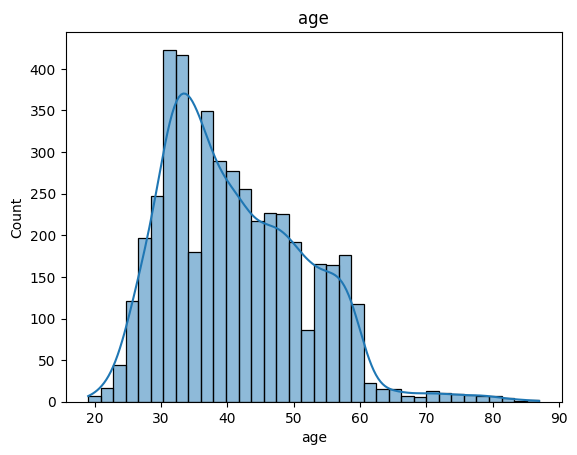

Value Counts of the  job  column is
 management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 



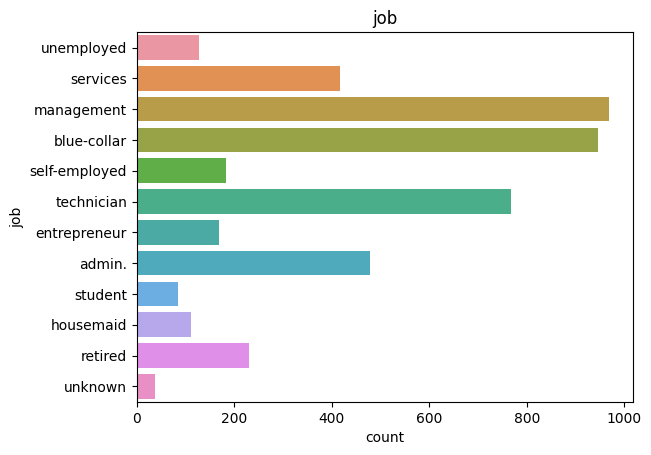

Value Counts of the  marital  column is
 married     2797
single      1196
divorced     528
Name: marital, dtype: int64 



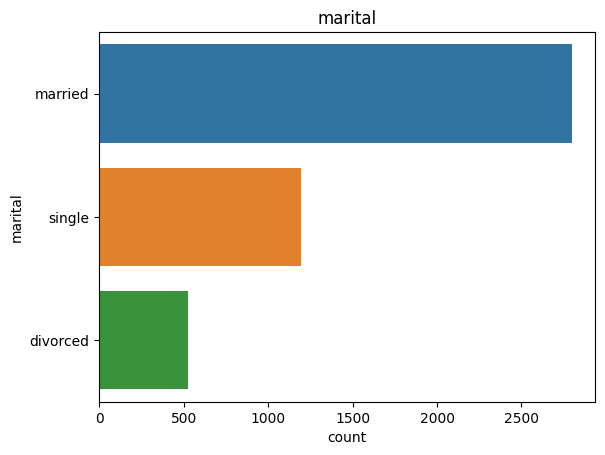

Value Counts of the  education  column is
 secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 



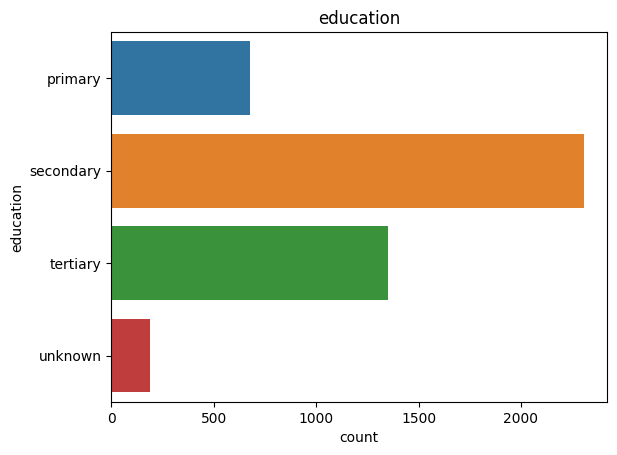

Value Counts of the  default  column is
 no     4445
yes      76
Name: default, dtype: int64 



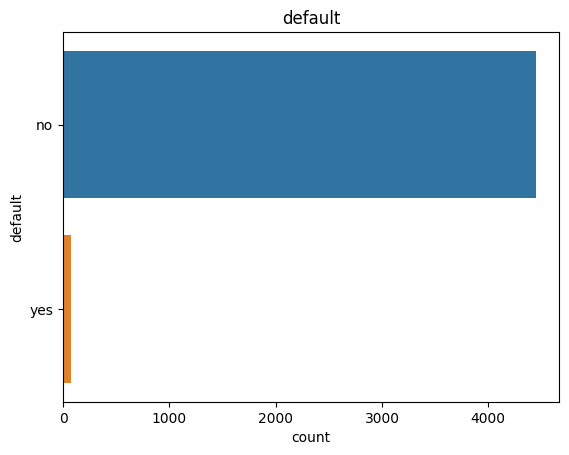

Value Counts of the  balance  column is
 0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: balance, Length: 2353, dtype: int64 



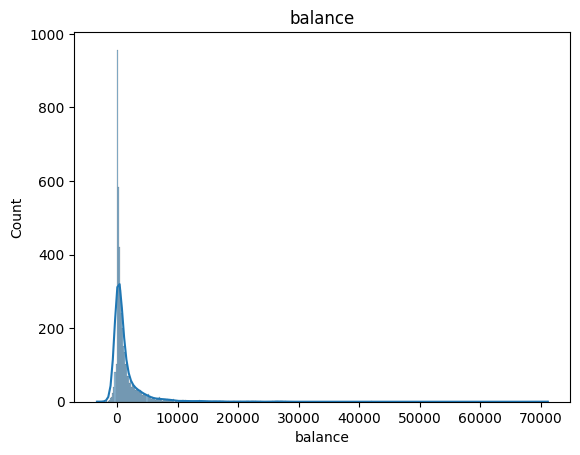

Value Counts of the  housing  column is
 yes    2559
no     1962
Name: housing, dtype: int64 



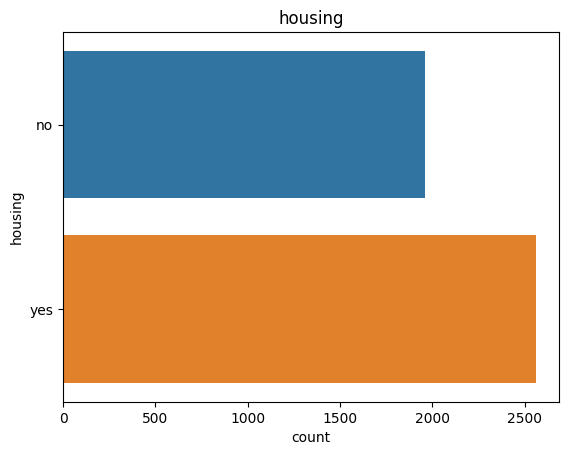

Value Counts of the  loan  column is
 no     3830
yes     691
Name: loan, dtype: int64 



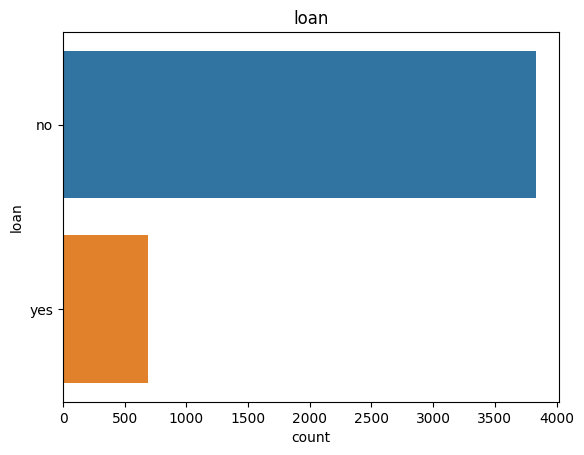

Value Counts of the  contact  column is
 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 



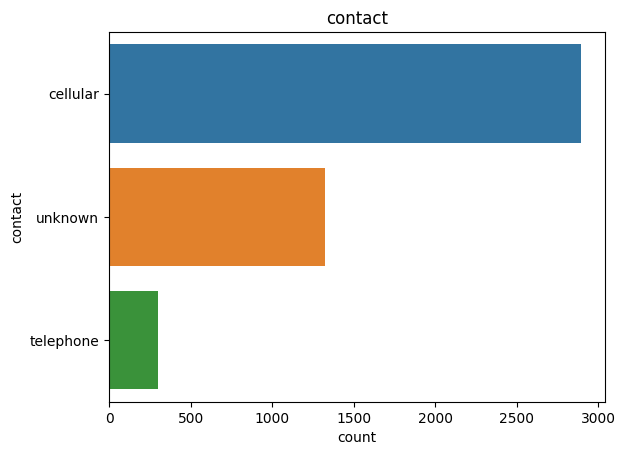

Value Counts of the  day  column is
 20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: day, dtype: int64 



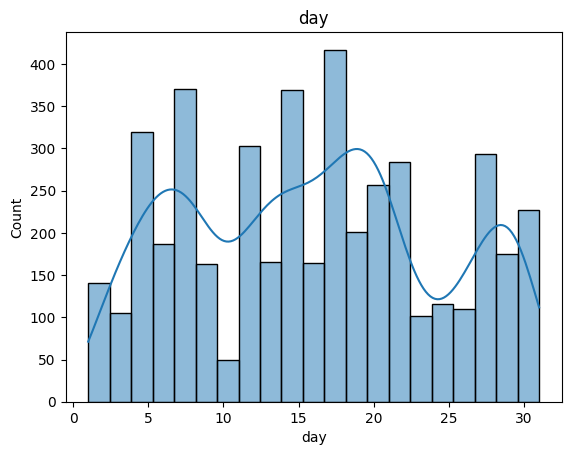

Value Counts of the  month  column is
 may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64 



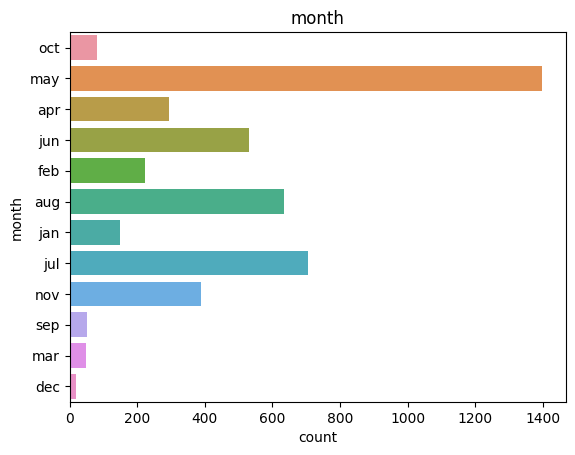

Value Counts of the  duration  column is
 123     27
104     25
119     23
77      22
58      22
        ..
762      1
602      1
923      1
1032     1
660      1
Name: duration, Length: 875, dtype: int64 



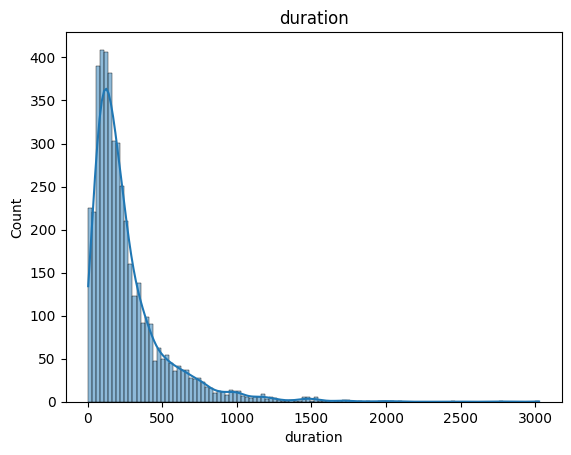

Value Counts of the  campaign  column is
 1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
19       3
20       3
28       3
24       3
32       2
21       2
23       2
22       2
31       1
29       1
50       1
30       1
44       1
Name: campaign, dtype: int64 



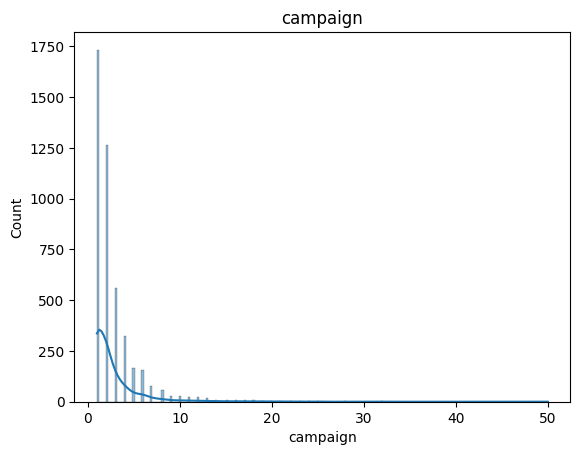

Value Counts of the  pdays  column is
 -1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: pdays, Length: 292, dtype: int64 



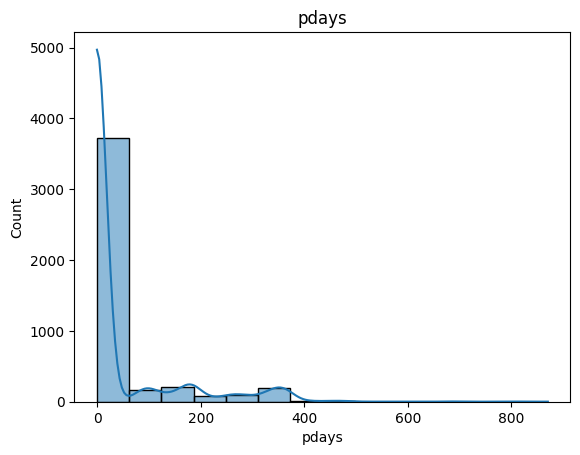

Value Counts of the  previous  column is
 0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: previous, dtype: int64 



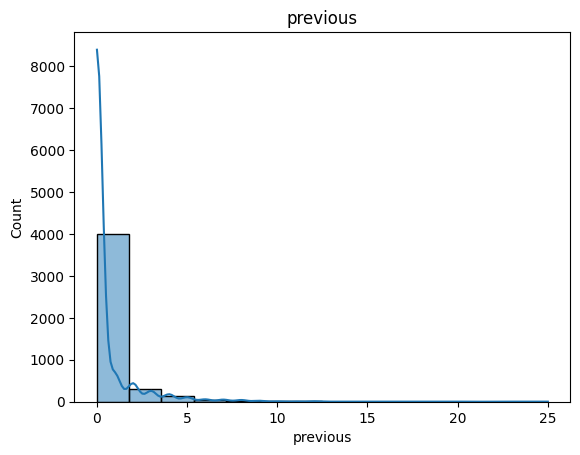

Value Counts of the  poutcome  column is
 unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64 



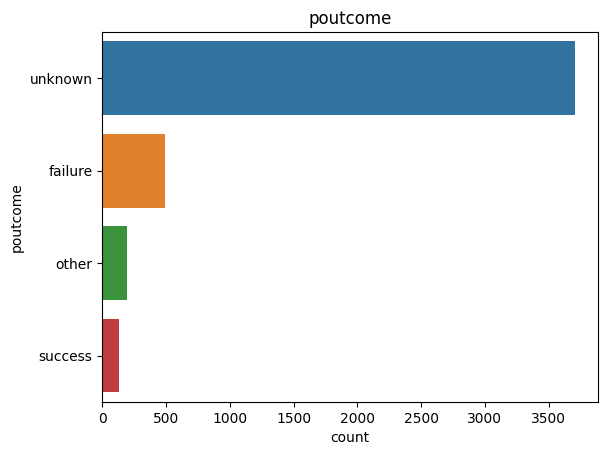

Value Counts of the  y  column is
 no     4000
yes     521
Name: y, dtype: int64 



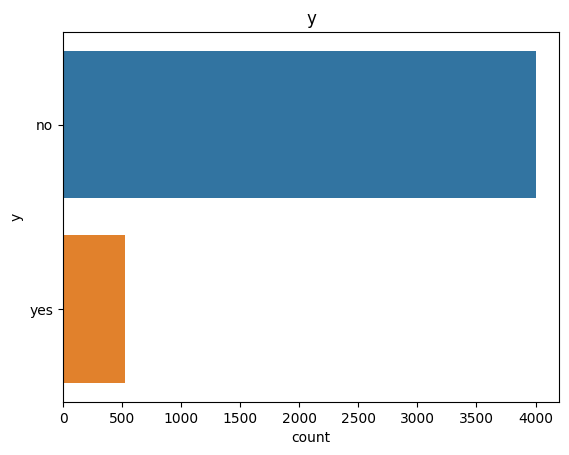

In [73]:
for i in data.columns:
    print('Value Counts of the ', i, ' column is\n', data[i].value_counts(), '\n')
    if data[i].dtype == 'object':
        sns.countplot(y=data[i])
    else:
        sns.histplot(data[i], kde=True)
    plt.title(i)
    plt.show()


# Xử lý dữ liệu

In [74]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [75]:
data['pdays']=data.pdays.replace(-1,0)

In [76]:
data.pdays.value_counts()

0      3705
182      23
183      20
363      12
92       12
       ... 
118       1
386       1
63        1
81        1
234       1
Name: pdays, Length: 292, dtype: int64

In [77]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,0,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,0,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,0,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [78]:
data_cat=data.select_dtypes(include='object')
data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [79]:
data_cat['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [80]:
data_cat['education']=data_cat['education'].replace(to_replace=['secondary','tertiary','primary','unknown'], value=[2,3,1,0])


In [81]:
data_cat['education'].value_counts()

2    2306
3    1350
1     678
0     187
Name: education, dtype: int64

In [82]:
data_cat['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [83]:
data_cat['month']=data_cat['month'].replace(to_replace=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],value=[1,2,3,4,5,6,7,8,9,10,11,12])

In [84]:
data_cat['month'].value_counts()

5     1398
7      706
8      633
6      531
11     389
4      293
2      222
1      148
10      80
9       52
3       49
12      20
Name: month, dtype: int64

In [85]:
data_cat['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [86]:
data_cat['poutcome']=data_cat['poutcome'].replace(to_replace=['unknown','failure','other','success'],value=[0,1,2,3])

In [87]:
data_cat['poutcome'].value_counts()

0    3705
1     490
2     197
3     129
Name: poutcome, dtype: int64

In [88]:
data_cat['poutcome']


0       0
1       1
2       1
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    2
4520    2
Name: poutcome, Length: 4521, dtype: int64

In [89]:
data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,1,no,no,no,cellular,10,0,no
1,services,married,2,no,yes,yes,cellular,5,1,no
2,management,single,3,no,yes,no,cellular,4,1,no
3,management,married,3,no,yes,yes,unknown,6,0,no
4,blue-collar,married,2,no,yes,no,unknown,5,0,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,2,no,yes,no,cellular,7,0,no
4517,self-employed,married,3,yes,yes,yes,unknown,5,0,no
4518,technician,married,2,no,no,no,cellular,8,0,no
4519,blue-collar,married,2,no,no,no,cellular,2,2,no


In [90]:
df_ex = data_cat.select_dtypes(exclude=np.number).columns
df_ex

Index(['job', 'marital', 'default', 'housing', 'loan', 'contact', 'y'], dtype='object')

In [91]:
from sklearn.preprocessing import LabelEncoder

df_le = LabelEncoder()
for i in df_ex:
    if i != 'y':
        data_cat[i] = df_le.fit_transform(data_cat[i])
data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,10,1,1,0,0,0,0,10,0,no
1,7,1,2,0,1,1,0,5,1,no
2,4,2,3,0,1,0,0,4,1,no
3,4,1,3,0,1,1,2,6,0,no
4,1,1,2,0,1,0,2,5,0,no
...,...,...,...,...,...,...,...,...,...,...
4516,7,1,2,0,1,0,0,7,0,no
4517,6,1,3,1,1,1,2,5,0,no
4518,9,1,2,0,0,0,0,8,0,no
4519,1,1,2,0,0,0,0,2,2,no


In [92]:
data_num=data.select_dtypes(include='number')
data_num

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,0,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,0,0
4,59,0,5,226,1,0,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,0,0
4517,57,-3313,9,153,1,0,0
4518,57,295,19,151,11,0,0
4519,28,1137,6,129,4,211,3


In [93]:
df=pd.concat([data_num,data_cat],axis=1)
df.head(20)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,30,1787,19,79,1,0,0,10,1,1,0,0,0,0,10,0,no
1,33,4789,11,220,1,339,4,7,1,2,0,1,1,0,5,1,no
2,35,1350,16,185,1,330,1,4,2,3,0,1,0,0,4,1,no
3,30,1476,3,199,4,0,0,4,1,3,0,1,1,2,6,0,no
4,59,0,5,226,1,0,0,1,1,2,0,1,0,2,5,0,no
5,35,747,23,141,2,176,3,4,2,3,0,0,0,0,2,1,no
6,36,307,14,341,1,330,2,6,1,3,0,1,0,0,5,2,no
7,39,147,6,151,2,0,0,9,1,2,0,1,0,0,5,0,no
8,41,221,14,57,2,0,0,2,1,3,0,1,0,2,5,0,no
9,43,-88,17,313,1,147,2,7,1,1,0,1,1,0,4,1,no


In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Phân chia dữ liệu

In [95]:
x=df.drop('y',axis=1)
y=df['y']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

# StandardScaler

In [97]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

# LogReg

In [98]:
model_lr=LogisticRegression()
model_LR = model_lr.fit(x_train_sc,y_train)

In [99]:
train_pred=model_lr.predict(x_train_sc)
test_pred=model_lr.predict(x_test_sc)
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95      3193
         yes       0.65      0.31      0.42       423

    accuracy                           0.90      3616
   macro avg       0.78      0.64      0.68      3616
weighted avg       0.88      0.90      0.88      3616

              precision    recall  f1-score   support

          no       0.91      0.98      0.94       807
         yes       0.57      0.24      0.34        98

    accuracy                           0.90       905
   macro avg       0.74      0.61      0.64       905
weighted avg       0.88      0.90      0.88       905



In [100]:
log_full_accuracy = accuracy_score(y_test,test_pred)
log_full_accuracy

0.8983425414364641

# NB

In [101]:
from sklearn.naive_bayes import GaussianNB
model_nbc=GaussianNB()
model_NB = model_nbc.fit(x_train_sc,y_train)

In [102]:
train_pred=model_nbc.predict(x_train_sc)

test_pred=model_nbc.predict(x_test_sc)
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          no       0.93      0.88      0.91      3193
         yes       0.36      0.51      0.42       423

    accuracy                           0.84      3616
   macro avg       0.65      0.69      0.66      3616
weighted avg       0.86      0.84      0.85      3616

              precision    recall  f1-score   support

          no       0.93      0.87      0.90       807
         yes       0.29      0.43      0.35        98

    accuracy                           0.82       905
   macro avg       0.61      0.65      0.62       905
weighted avg       0.86      0.82      0.84       905



In [103]:
naivebayes_imp_accuracy = accuracy_score(y_test,test_pred)
naivebayes_imp_accuracy

0.8243093922651934

# KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
accuracy={}
error1=[]
error2=[]
for k in range(1,15,1):
    model_knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')

    #Fitting
    model_KNN = model_knn.fit(x_train_sc,y_train)

    #Predicting
    train_pred=model_knn.predict(x_train_sc)
    test_pred=model_knn.predict(x_test_sc)

    #errors
    error1.append(np.mean(y_train!= train_pred))
    error2.append(np.mean(y_test!= test_pred))

    tr_acc=accuracy_score(y_train,train_pred)

    ts_acc=accuracy_score(y_test,test_pred)

    accuracy[k]=[tr_acc,ts_acc]
accuracy

{1: [1.0, 0.8850828729281768],
 2: [0.9236725663716814, 0.9027624309392265],
 3: [0.9325221238938053, 0.8972375690607735],
 4: [0.9126106194690266, 0.9049723756906077],
 5: [0.9189712389380531, 0.9038674033149171],
 6: [0.9059734513274337, 0.8983425414364641],
 7: [0.9101216814159292, 0.8994475138121547],
 8: [0.90625, 0.8939226519337017],
 9: [0.90625, 0.8994475138121547],
 10: [0.9043141592920354, 0.8994475138121547],
 11: [0.9059734513274337, 0.8994475138121547],
 12: [0.901825221238938, 0.901657458563536],
 13: [0.9051438053097345, 0.8994475138121547],
 14: [0.9012721238938053, 0.9005524861878453]}

In [105]:
model_knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')

model_knn.fit(x_train_sc,y_train)

train_pred=model_knn.predict(x_train_sc)
test_pred=model_knn.predict(x_test_sc)
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          no       0.93      0.99      0.96      3193
         yes       0.81      0.40      0.54       423

    accuracy                           0.92      3616
   macro avg       0.87      0.69      0.75      3616
weighted avg       0.91      0.92      0.91      3616

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.62      0.30      0.40        98

    accuracy                           0.90       905
   macro avg       0.77      0.64      0.67       905
weighted avg       0.89      0.90      0.89       905



In [106]:
knn_accuracy = accuracy_score(y_test,test_pred)
knn_accuracy

0.9038674033149171

# SVM

In [107]:
from sklearn.svm import SVC

model_svclassifier = SVC(kernel = 'linear')
model_SVM = model_svclassifier.fit(x_train_sc, y_train)

In [108]:
train_pred = model_svclassifier.predict(x_train_sc)
test_pred =model_svclassifier.predict(x_test_sc)
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      3193
         yes       0.69      0.21      0.32       423

    accuracy                           0.90      3616
   macro avg       0.80      0.60      0.63      3616
weighted avg       0.88      0.90      0.87      3616

              precision    recall  f1-score   support

          no       0.91      0.98      0.95       807
         yes       0.59      0.20      0.30        98

    accuracy                           0.90       905
   macro avg       0.75      0.59      0.62       905
weighted avg       0.88      0.90      0.88       905



In [109]:
svc_accuracy=accuracy_score(y_test,test_pred)
svc_accuracy

0.8983425414364641

# ID3

In [110]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree_model = DecisionTreeClassifier()

model_ID3 = model_decision_tree_model.fit(x_train_sc, y_train)

In [111]:
train_pred = model_decision_tree_model.predict(x_train_sc)
test_pred =model_decision_tree_model.predict(x_test_sc)
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      3193
         yes       1.00      1.00      1.00       423

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616

              precision    recall  f1-score   support

          no       0.93      0.92      0.92       807
         yes       0.36      0.40      0.38        98

    accuracy                           0.86       905
   macro avg       0.65      0.66      0.65       905
weighted avg       0.87      0.86      0.86       905



In [112]:
dtr_accuracy=accuracy_score(y_test,test_pred)
dtr_accuracy

0.8596685082872928

# Accuracy

In [113]:
models_Accuracy_df = pd.DataFrame({
    'Classification Model': ['LOG-REG-FULL', "NAIVE-BAYES", 'KNN', 'SVM', 'ID3'],
    'Accuracy': [log_full_accuracy * 100, naivebayes_imp_accuracy * 100,
                 knn_accuracy * 100, svc_accuracy * 100, dtr_accuracy * 100]
})

models_Accuracy_df


,Classification Model,Accuracy
0,LOG-REG-FULL,89.834254
1,NAIVE-BAYES,82.430939
2,KNN,90.386740
3,SVM,89.834254
4,ID3,85.966851


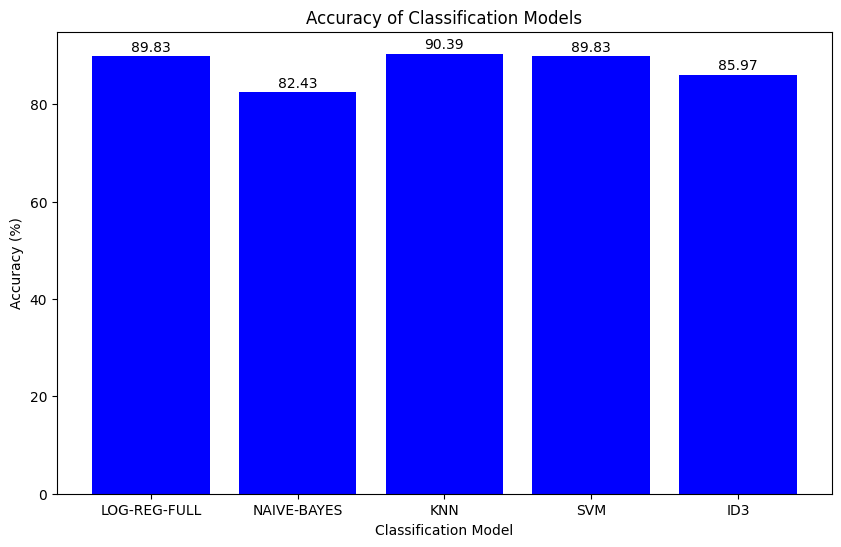

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(models_Accuracy_df['Classification Model'], models_Accuracy_df['Accuracy'], color='blue')

for i, v in enumerate(models_Accuracy_df['Accuracy']):
    plt.text(i, v + 0.5, "{:.2f}".format(v), ha='center', va='bottom')

plt.xlabel('Classification Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Classification Models')

# Show the plot
plt.show()

In [115]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [116]:
import anvil.server
anvil.server.connect("server_FSAXJABBJBQPVVHLPDXZI4EQ-7AMUI5MFCEWY2FUY")

In [117]:
@anvil.server.callable
def predict_model(age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome):
  classification = model_NB.predict([[age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome]])
  return classification[0]

In [118]:
predict_model(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11)

'yes'

In [119]:
#anvil.server.wait_forever()